# Trabajo Práctico 6 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [2]:
# Import libraries
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Display function
def display_np(x, scale = 1.0, resampling = Image.Resampling.BICUBIC):
    im = Image.fromarray(x.clip(0, 255).astype(np.uint8))
    display(im.resize((np.array(im.size)*scale).astype(int), resampling))

## Ejercicio 1
### Segmentación de imágenes usando espacios de color

In [79]:
# Source: https://realpython.com/python-opencv-color-spaces/

# Colored 3D Scatter Plot

def color_scatter_3d(img, size, mode='rgb'):
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    if mode=='rgb':
        r, g, b = cv2.split(img)
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")
        
        axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Red")
        axis.set_ylabel("Green")
        axis.set_zlabel("Blue")
    elif mode=='hsv':
        h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")

        axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Hue")
        axis.set_ylabel("Saturation")
        axis.set_zlabel("Value")
    elif mode=='hls':
        h, l, s = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")

        axis.scatter(h.flatten(), l.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Hue")
        axis.set_ylabel("Lightness")
        axis.set_zlabel("Saturation")
    
    plt.show()

#### a) Finding Nemo

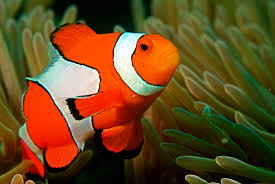

In [37]:
# Color Spaces and Reading Images in OpenCV

nemo = cv2.imread('images/nemo0.jpg')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

display_np(nemo)

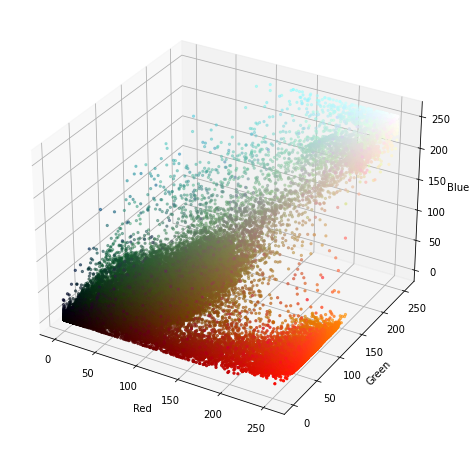

In [45]:
# Visualizing Nemo in RGB Color Space

color_scatter_3d(nemo, (8, 8))

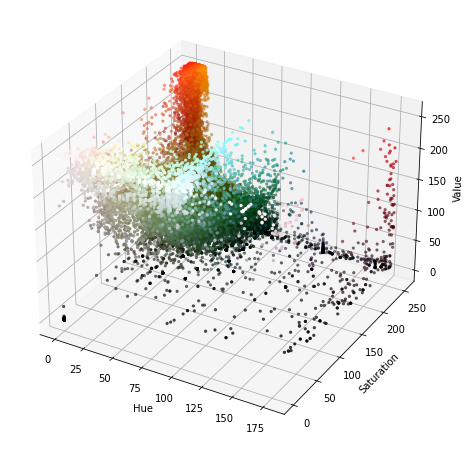

In [46]:
# Visualizing Nemo in HSV Color Space

color_scatter_3d(nemo, (8, 8), 'hsv')

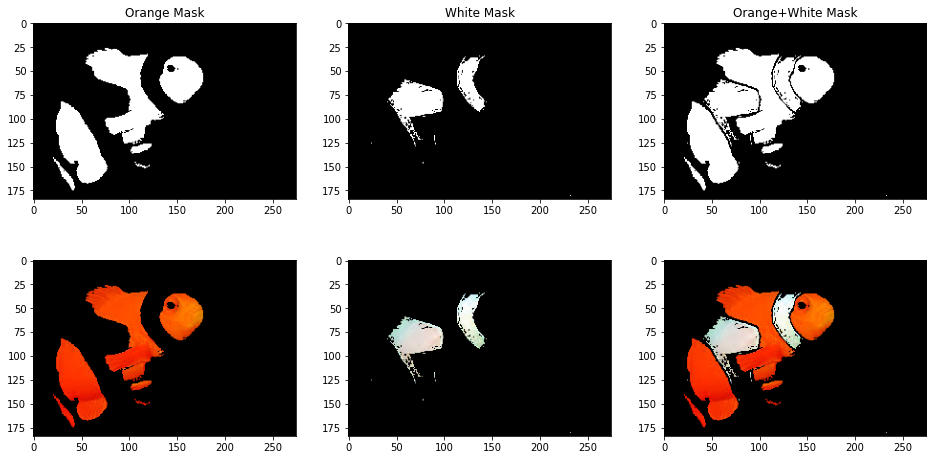

In [59]:
# Picking Out a Range

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplots(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(mask, cmap="gray")
plt.title('Orange Mask')
plt.subplot(2, 3, 4)
plt.imshow(result)

light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(2, 3, 2)
plt.title('White Mask')
plt.imshow(mask_white, cmap="gray")
plt.subplot(2, 3, 5)
plt.imshow(result_white)


final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(2, 3, 3)
plt.title('Orange+White Mask')
plt.imshow(final_mask, cmap="gray")
plt.subplot(2, 3, 6)
plt.imshow(final_result)
plt.show()

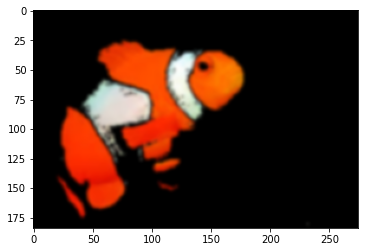

In [60]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

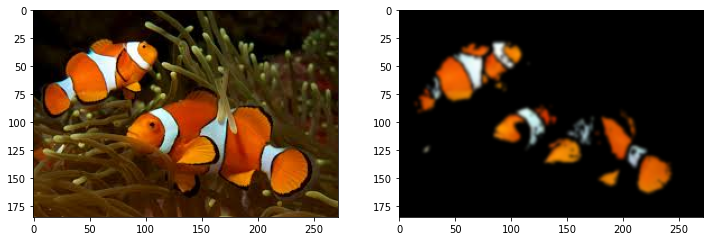

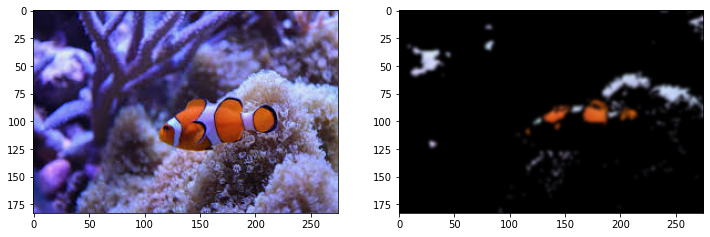

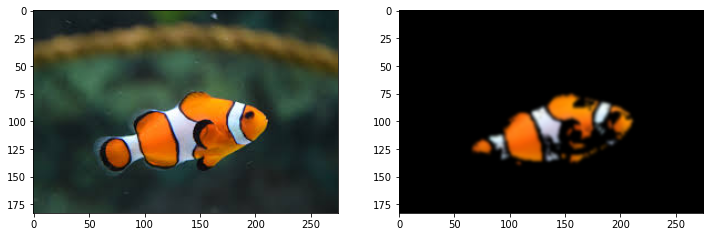

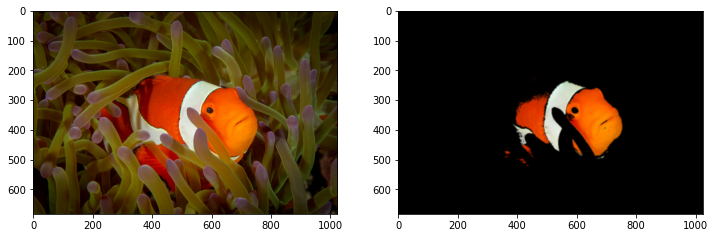

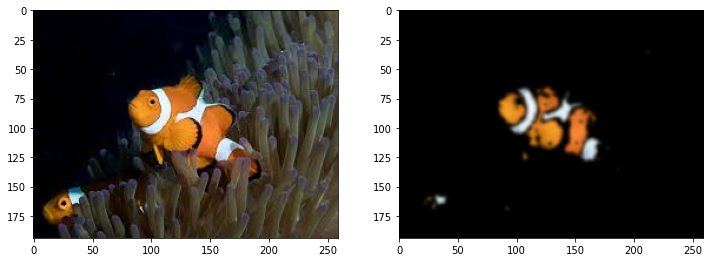

In [65]:
def segment_fish(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

path = "images/nemo"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

##### Funcionamiento

La forma en la cual este mecanismo de segmentación funciona es aplicando una máscara que elimina todo pixel que no se encuentra dentro de un rango de valores en cada una de las 3 coordenadas del espacio de color elegido. En el caso de HSV, esto significa que todo pixel dentro de un rango de matiz, saturación y brillo es seleccionado mediante una máscara. Así, un pez payaso de color diferente al entorno puede ser detectado.

##### Conclusión

El espacio de color HSV ofrece ciertas ventajas para la segmentación de colores en una imagen, dado que en lugar de basarse en la anatomía de la visión humana, se basan en características más propias del color como el brillo. Aplicando una máscara de cierto rango de valores para la *matiz*, es posible seleccionar un rango de colores con mayor facilidad que en el caso de otros espacios de color.

Sin embargo, se puede notar que en algunas imagenes donde las propiedades de brillo, saturacion o matiz varían con respecto a los rangos elegidos el método deja de funcionar ya que tiene umbrales absolutos.

#### b) Bird

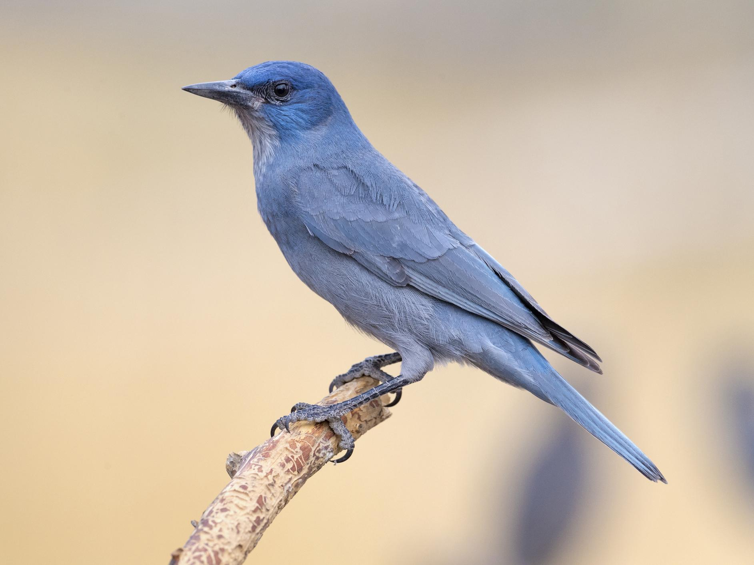

In [72]:
bird = cv2.imread("images/bird.jpg")
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

display_np(bird, 0.4)

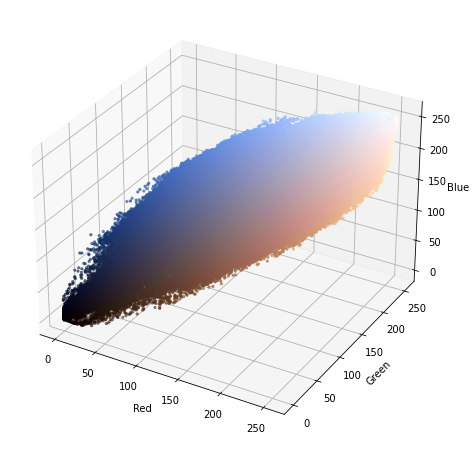

In [73]:
# Visualización en espacio RGB

color_scatter_3d(bird, (8, 8))

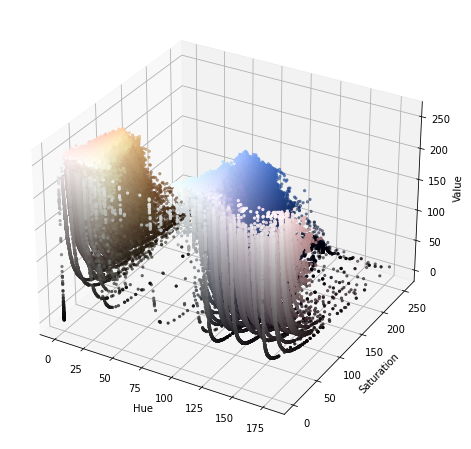

In [74]:
# Visualización en espacio HSV

color_scatter_3d(bird, (8, 8), 'hsv')

Estableciendo dos colores nos quedamos con una "caja" es el espacio HSV, de forma que podemos aislar los tonos azules del pájaro.

In [ ]:
light_blue = (100, 45, 0)
dark_blue = (125, 255, 255)

In [ ]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

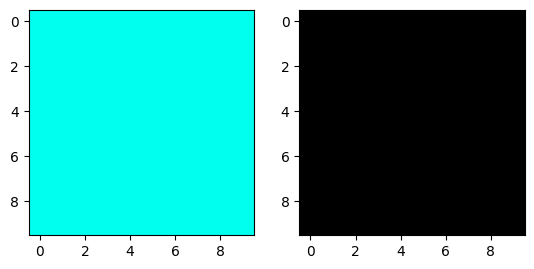

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

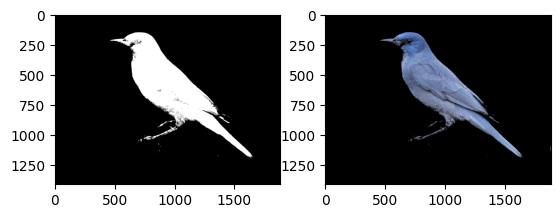

In [ ]:
hsv_bird =  cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

mask = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

plt.imsave("images/bird_segm.jpg", result)

#### c) Rosa

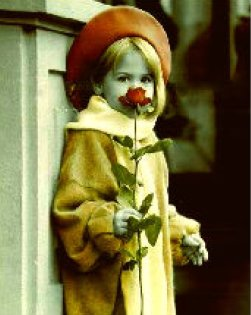

In [75]:
rose = cv2.imread("images/Girl_and_rose.jpg")
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)

display_np(rose)

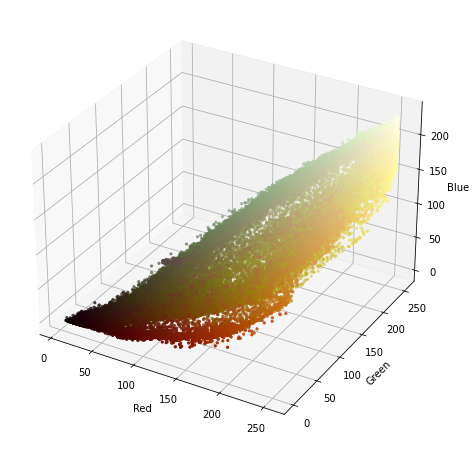

In [76]:
# Visualización en espacio RGB

color_scatter_3d(rose, (8, 8))

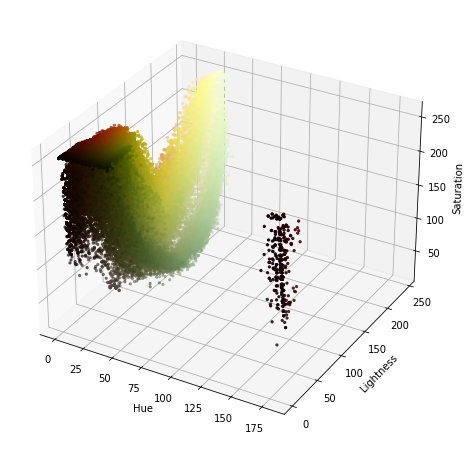

In [80]:
# Visualización en espacio HLS

color_scatter_3d(rose, (8, 8), 'hls')

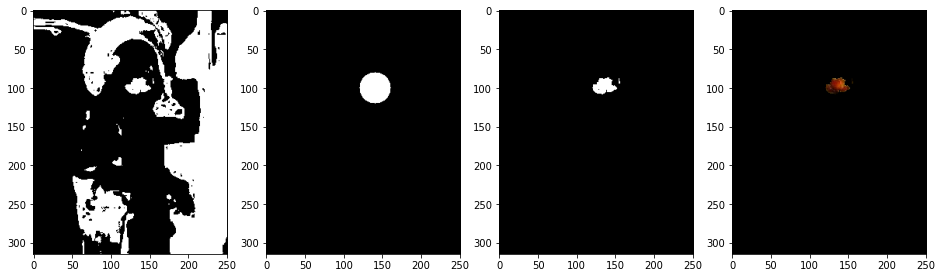

In [81]:
hls_rose =  cv2.cvtColor(rose, cv2.COLOR_RGB2HLS)

light_red = (0, 0, 100)
dark_red = (20, 150, 255)

mask1 = cv2.inRange(hls_rose, light_red, dark_red)

mask2 = np.zeros(rose.shape[:2], dtype="uint8")
cv2.circle(mask2, (140, 100), 20, 255, -1)
cv2.imshow("Rectangular Mask", mask)

mask = mask1 & mask2

rose_only = cv2.bitwise_and(rose, rose, mask=mask)

plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(rose_only)
plt.show()

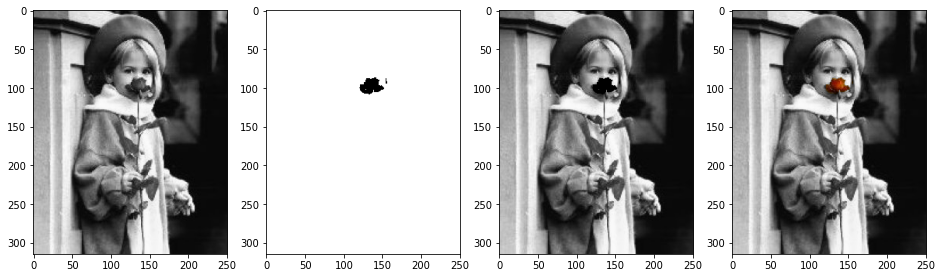

In [82]:
rose_gray = cv2.cvtColor(rose, cv2.COLOR_RGB2GRAY)
rose_gray = np.stack((rose_gray,)*3, axis=-1)

invmask = ~mask

rose_gray_withoutrose = cv2.bitwise_and(rose_gray, rose_gray, mask=invmask) 
result = rose_gray_withoutrose + rose_only

plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1)
plt.imshow(rose_gray, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(invmask, cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(rose_gray_withoutrose, cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(result)
plt.show()


plt.imsave("images/rose_segm.jpg", result)

#### d) Segmentación de color usando K-Means Clustering

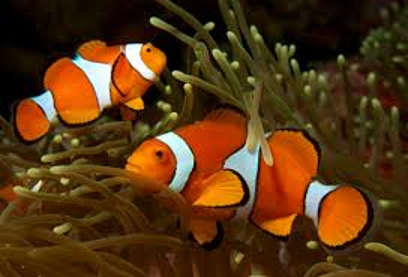

In [3]:
# Source: https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

# read the image
image = cv2.imread("images/nemo1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_np(image, 1.5)

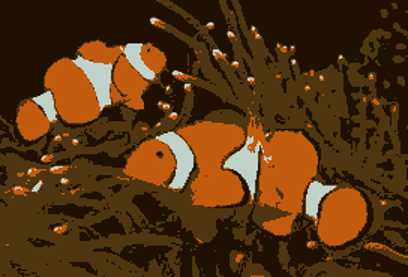

In [4]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
display_np(segmented_image, 1.5)

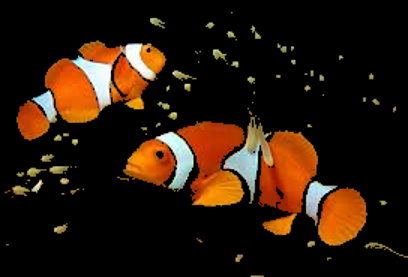

In [6]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)

# show the image
display_np(masked_image, 1.5)

## Ejercicio 2
### Procesamiento del color

#### a) Filtro de Bayer
Los sensores de imagenes típicos utilizados en las cámaras digitales actuales están compuestos por multiples fotosensores individuales que capturan la intensidad de la luz proveniente de la escena a capturar.
El problema es que estos fotosensores no pueden obtener información del color de la escena de forma nativa, ya que no pueden detectar las variaciones en la longitud de onda de la luz recibida, sino solo su intensidad. Para solucionar esto y poder obtener imagenes a color, se superpone el sensor con los denominados arreglos de filtro de color, o CFA por sus siglas en ingles (Color Filter Array). Este es un arreglo de multiples filtros de color para los pixeles, para justamente obtener la información de color de la imagen capturada. Así, básicamente se hace que cada pixel guarde información de un color específico (rojo, azul o verde) y luego mediante un algoritmo de interpolación se obtiene una representación de la imagen.

El denominado filtro de Bayer es uno de los CFA más comunes de encontrar en las cámaras digitales actuales. Es un arreglo que utiliza el doble de filtros de color verde comparado con los filtros de color azul y rojo, ya que el ojo humano es más sensible a este color y por ende utilizando este CFA se puede obtener una representación más fiel a lo observado por el ojo humano.

Un ejemplo de forma del filtro de Bayer es el siguiente:

G            R            G            R

B            G            B            G

G            R            G            R

B            G            B            G

#### b) Demosaicing
El proceso o algoritmo de demosaicing es la manera de pasar desde una imagen capturada por un sensor que utiliza un filtro de Bayer, a una imagen completa a color.
Como cada pixel del sensor digital, por más que recibe la información completa del filtro, solo puede guardar la información de uno de los colores, hace falta un algoritmo para completar la información de color de la imagen. Un ejemplo de un algoritmo de demosaicing simple es realizar el promedio de los valores de los pixeles aledaños y así realizar una especie de interpolación para obtener el valor final de colores del pixel correspondiente.

#### c) Implementación de demosaicing con una imagen RAW
En este ejemplo vamos a tomar la información cruda obtenida por un sensor que utiliza un filtro de Bayer y vamos a obtener una imagen completa a color utilizando un algoritmo de demosaicing.

In [36]:
# Importamos las bibliotecas a utilizar
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [37]:
# Definimos las funciones a utilizar por nuestro programa

def wbscalematrix(m, n, wb_scales, align):
	# Genera la matriz de escalado necesaria para realizar white balancing para una imagen de tamaño m x n
	# utilizando los factores de escala de white balance dados ([wb_scales] = [R_scale G_scale B_scale]).
    # [align] es un string que indica el arreglo correspondiente del filtro de Bayer de la imagen:
    # 'rggb':  
    #    R G 
    #    G B 
    # 'gbrg':
    #    G B
    #    R G
    # 'grbg':
	# 	 G R
	# 	 B G
	# 'bggr':
	# 	 B G
	# 	 G R

    # Primero rellenamos la matriz de escala de white balance con pixeles verdes, ya que son los más frecuentes,
	# y luego reemplazamos según corresponda los pixeles rojos y azules.

    scalematrix = wb_scales[1] * np.ones((m,n)) # Inicializamos la matriz con la escala de los pixeles verdes.
    # Reemplazamos donde corresponda por la escala de los pixeles azules o rojos
    if (align == 'rggb'):
        scalematrix[0::2, 0::2] = wb_scales[0] # r
        scalematrix[1::2, 1::2] = wb_scales[2] # b
    elif (align == 'bggr'):
        scalematrix[1::2, 1::2] = wb_scales[0] # r
        scalematrix[0::2, 0::2] = wb_scales[2] # b
    elif (align == 'grbg'):
        scalematrix[0::2, 1::2] = wb_scales[0] # r
        scalematrix[0::2, 1::2] = wb_scales[2] # b
    elif (align == 'gbrg'):
        scalematrix[1::2, 0::2] = wb_scales[0] # r
        scalematrix[0::2, 1::2] = wb_scales[2] # b
    return scalematrix

def apply_cmatrix(img, cmatrix):
	# Aplica la transformación de color dada por cmatrix a la imagen img (que debería estar en formato RGB).
	# Esto se utiliza en nuestro programa para pasar del espacio de color de la cámara al espacio sRGB.
	# En lugar de realizar la transformación matricial para cada pixel, obtenemos de cmatrix y de la imagen
	# los pesos necesarios que le debemos aplicar a cada plano de color del espacio original para que se
	# transforme en el plano de color del espacio deseado, ya que este proceso es mucho más eficiente.
    if (img.shape[2] != 3):
        raise ValueError('Apply cmatrix to RGB image only.')

    r = cmatrix[0,0] * img[:,:,0] + cmatrix[0,1] * img[:,:,1] + cmatrix[0,2] * img[:,:,2]
    g = cmatrix[1,0] * img[:,:,0] + cmatrix[1,1] * img[:,:,1] + cmatrix[1,2] * img[:,:,2]
    b = cmatrix[2,0] * img[:,:,0] + cmatrix[2,1] * img[:,:,1] + cmatrix[2,2] * img[:,:,2]
    corrected = np.stack((r,g,b), axis=2)
    return corrected	
	
def debayering(input):
	# Realiza el proceso de debayering de la imagen RAW recibida en input, utilizando interpolación bilineal
	# para obtener los colores correspondientes a cada pixel de la imagen RGB resultante.
    #
    # Esta función asume un filtro de Bayer de forma RGGB:
    #   R G R G
    #   G B G B
    #   R G R G
    #   G B G B
    #
    # Input: Imagen con filtro de Bayer RGGB de un solo canal.
    # Return: Imagen luego del proceso de debayering, es decir una imagen RGB de tres canales.

    img = input.astype(np.double)

    m = img.shape[0]
    n = img.shape[1]

	# Primero creamos las máscaras de cada color para la configuración RGGB, para luego obtener de la imagen de un solo
	# canal la información de cada uno de los colores, y así poder realizar la interpolación entre estos.
    red_mask = np.tile([[1,0],[0,0]], (int(m/2), int(n/2)))
    green_mask = np.tile([[0,1],[1,0]], (int(m/2), int(n/2)))
    blue_mask = np.tile([[0,0],[0,1]], (int(m/2), int(n/2)))
    r = np.multiply(img, red_mask)
    g = np.multiply(img, green_mask)
    b = np.multiply(img, blue_mask)

	# Luego, realizamos la interpolación de los valores obtenidos para cada uno de los colores, utilizando la mencionada
	# interpolación bilineal, implementandola con convolución del filtro de cada color en 2 dimensiones.
	# Al convolucionar con el filtro normalizado de color de tamaño 3x3, lo que estamos haciendo es ir tomando el promedio
	# de los valores de los pixeles aledaños correspondientes, y lo sumamos al pixel SOLO SI el patrón del filtro coincide 
	# con el patrón de dichos pixeles aledaños.
  
    # Interpolamos primero el color verde:
    filter_g = 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]]) # Siempre el filtro debe estar normalizado a 1
    missing_g = convolve2d(g, filter_g, 'same')
    g = g + missing_g

    # Now, let's try it for blue. This one is a two-step process.
    # - Step 1: We fill in the 'central' blue pixel in the location of the red pixel
    # - Step 2: We fill in the blue pixels at the locations of the green pixels, 
    #           similar to how the green interpolation worked, but offset by a row/column
    #
    # Sketch out the matrices to help you follow.
    # Remember, we'll still have some incorrect value at the image boundaries.

    # Interpolamos el azul (este proceso se realiza en dos pasos, ya que primero se interpola en la ubicación de los pixeles o
	# rojos, y luego en la de los pixeles verdes):
    # Paso 1 (interpolando en el pixel rojo central):
    filter1 = 0.25 * np.array([[1,0,1],[0,0,0],[1,0,1]])
    missing_b1 = convolve2d(b, filter1, 'same')
    # Paso 2 (Interpolando en la ubicación de los pixeles verdes):
    filter2 = 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]])
    missing_b2 = convolve2d(b + missing_b1, filter2, 'same')
    b = b + missing_b1 + missing_b2

    # Interpolamos el color rojo (mismo proceso que el azul):
    filterR1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    missing_r1 = convolve2d(r, filterR1, 'same')
    filterR2 = 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]])
    missing_r2 = convolve2d(r + missing_r1, filterR2, 'same')
    r = r + missing_r1 + missing_r2

    output = np.stack((r,g,b), axis=2)
    return output

def rgb2gray(rgb):
	# Convierte de una imagen RGB de tres canales guardada en un arreglo de Numpy a una imagen de un solo canal en escala de grises
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

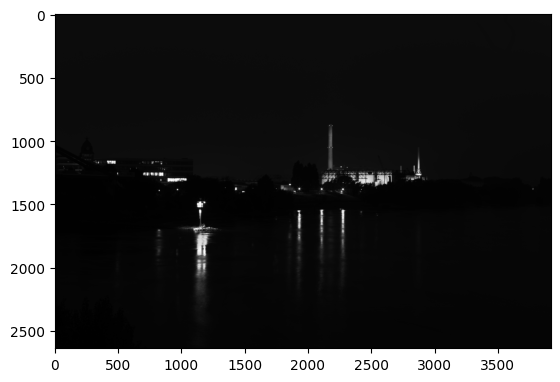

In [39]:
# Primer paso: Convertir la imagen RAW a TIFF y obtener las constantes necesarias (punto del negro, valor máximo de saturación del sensor, multiplicadores para balance de blanco)

# 'black': El valor del color negro en la imagen RAW
black = 0
# 'saturation': El valor máximo producido por el sensor (color blanco).
saturation = 16383  
# 'wb_multipliers': los multiplicadores para realizar white balance en los canales R, G y B.
wb_multipliers = [2.217041, 1.000000, 1.192484]

# Abrimos la imagen TIFF generada al utilizar la herramienta dcraw con la linea de comandos sobre una imagen RAW (comando "dcraw -4 -D -T <raw_file_name>")
raw_data = Image.open('dcraw/sample.tiff')

# La convertimos en un arreglo de Numpy para poder operar sobre ella
raw = np.array(raw_data).astype(np.double)
plt.imshow(raw, cmap='gray')
plt.show()

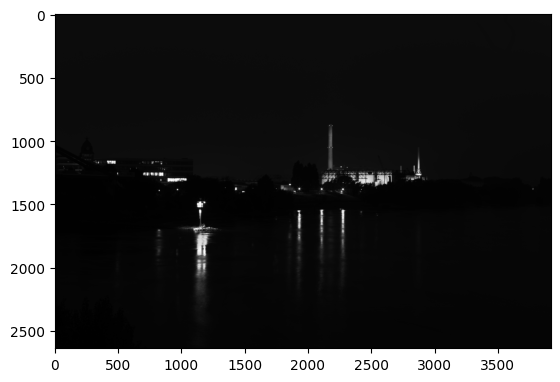

In [40]:
# Segundo paso: Linealización y normalización

# El arreglo bidimensional que obtuvimos en el paso anterior a partir de la imagen puede ser un arreglo no lineal, ya que existe la posibilidad
# de que la cámara le aplique a las imagenes tomadas mediante la misma una transformación no lineal a la información que recibe del sensor
# por cuestiones de almacenamiento. Sin embargo, la opción "-4" de dcraw nos linealiza la imagen, por lo que no es necesario que lo hagamos manualmente.

# Debemos entonces normalizar la misma para que los valores de esta caigan entre 0 y 1, ya que existe la posibilidad de que la imagen posea además de
# una transformación no lineal, un offset o un escalado según la cámara utilizada.
linear_bayer = (raw - black) / (saturation - black)
plt.imshow(linear_bayer, cmap='gray')
plt.show()

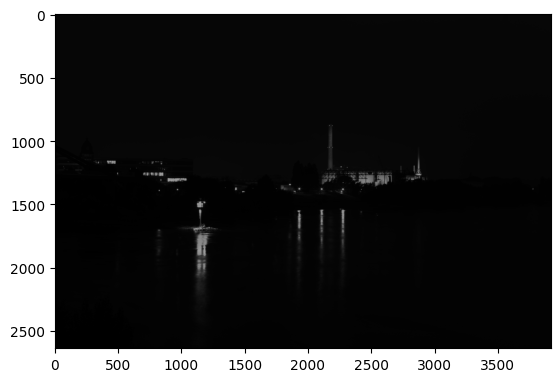

In [41]:
# Tercer paso: White Balancing

# Uno de los posibles procesos para obtener, desde la imagen normalizada, los colores tal como los ve el ojo humano, se denomina balance de
# blancos o "White Balancing". Consiste en encontrar un pixel de referencia en la misma, que como tiene que ser de color conocido se utiliza blanco,
# luego reescalar los valores de ese pixel para que efectivamente sea de color blanco (es decir, que los canales R, G y B sean iguales), y con estos
# valores de referencia de escala, asumiendo que la misma fuente de luz esta iluminando a toda la imagen, escalamos a todos los pixeles de la imagen.
mask = wbscalematrix(linear_bayer.shape[0], linear_bayer.shape[1], wb_multipliers, 'rggb')
balanced_bayer = np.multiply(linear_bayer, mask)

plt.imshow(balanced_bayer, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


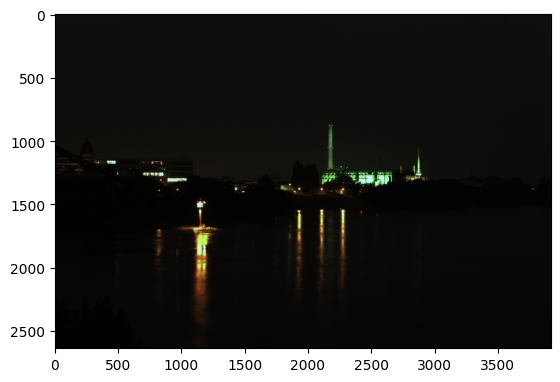

In [42]:
# Cuarto paso: Debayering

# En este paso es cuando aplicamos el proceso de debayering, mediante el cual obtenemos de la imagen, luego del normalizado y el white balancing,
# los colores correspondientes a cada pixel según el algoritmo elegido. Como se mencionó anteriormente en la función de debayering, el algoritmo
# utilizado es una interpolación bilineal considerando que el filtro de Bayer de la imagen es RGGB.
lin_rgb = debayering(balanced_bayer)
plt.imshow(lin_rgb)
plt.show()

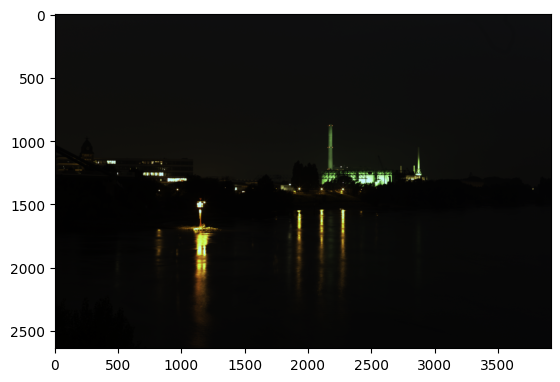

In [43]:
# Quinto paso: Conversion del espacio de color (Opcional)

# Este paso es opcional, ya que el proceso de debayering se realizó en el paso anterior. En este paso, lo que se hace es convertir a la imagen
# obtenida mediante el debayering desde el espacio de color de la cámara utilizada a un espacio de color estandar RGB, llamado sRGB, que es el
# estandar más utilizado en los monitores de computadora actuales. Así, obtenemos una representación más fiel del color de la imagen en nuestro display.
# Para realizar esa transformación, utilizamos dos matrices transformadoras de 3x3 en cada pixel. Las mismas dependen de la cámara utilizada, por
# lo que pueden variar según la imagen que se este procesando.
rgb2xyz = np.array([[0.4124564, 0.3575761, 0.1804375],
            [0.2126729, 0.7151522, 0.0721750],
            [0.0193339, 0.1191920, 0.9503041]])
xyz2cam = np.array([[0.6653, -0.1486, -0.0611],
            [-0.4221, 1.3303, 0.0929],
            [-0.0881, 0.2416, 0.7226]])
rgb2cam = xyz2cam * rgb2xyz
denom = np.tile(np.reshape(np.sum(rgb2cam,axis=1),(3,-1)), (1,3))
rgb2cam = np.divide(rgb2cam, denom) # Normalizamos a 1
cam2rgb = np.linalg.inv(rgb2cam)
lin_srgb = apply_cmatrix(lin_rgb, cam2rgb)
lin_srgb[lin_srgb > 1.0] = 1.0 # Mantenemos el rango de la imagen entre 0 y 1
lin_srgb[lin_srgb < 0.0] = 0.0
plt.imshow(lin_srgb)
plt.show()

Imagen con brillo aumentado:


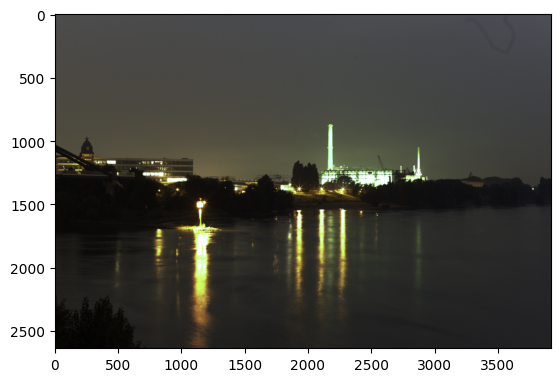

Imagen para gamma = 1.6 :


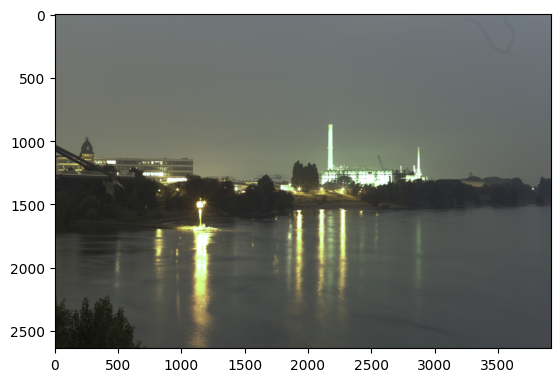

Imagen para gamma = 1.8 :


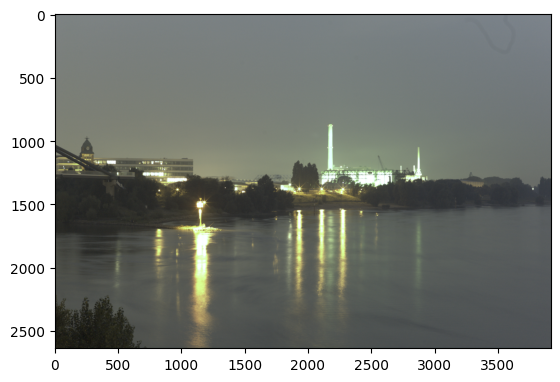

Imagen para gamma = 2.0 :


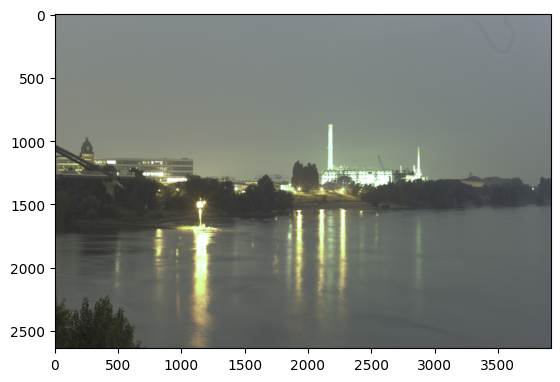

Imagen para gamma = 2.2 :


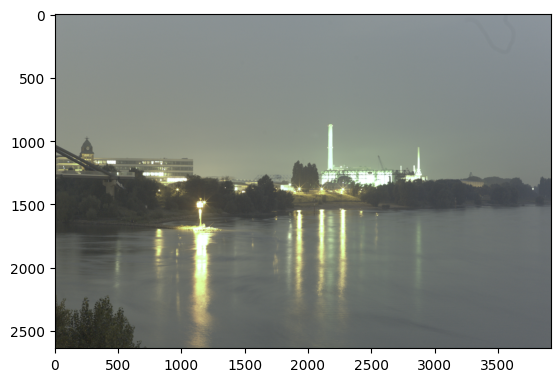

Imagen para gamma = 2.4 :


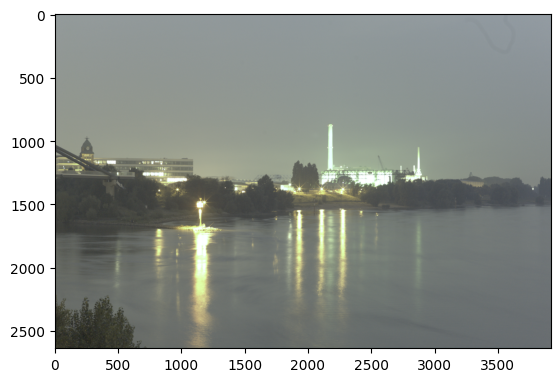

Imagen para gamma = 2.6 :


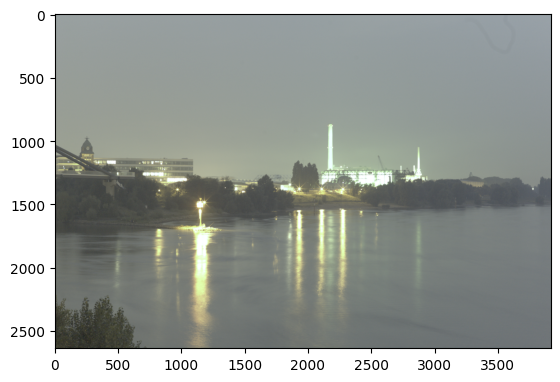

Imagen para gamma = 2.8 :


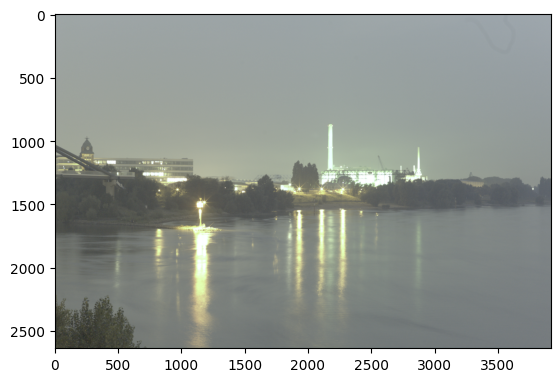

In [44]:
# Sexto paso: Corrección de brillo y de gamma (Opcional)

# Ya luego de la conversión del espacio de color, tenemos una imagen sRGB de 16 bits por pixel. Sin embargo, sobre la misma se pueden hacer aún algunas mejoras
# con respecto a su "belleza". Esto es porque la imagen obtenida hasta ahora es la imagen tal cual fue obtenida por la cámara, y esto puede hacer que sea
# muy oscura en general o con poco contraste, con respecto al rango dinámico obtenible en un display moderno. Por ende, podemos aumentar (o disminuir) su brillo
# y aumentar su contraste para aprovechar el mencionado rango dinámico de mejor manera.

# Aumentamos entonces el brillo de la imagen (de forma arbitraria) escalando su luminosidad media a 1/4 del valor máximo de intensidad posible:
print("Imagen con brillo aumentado:")
grayim = rgb2gray(lin_srgb)
grayscale = 0.25/np.mean(grayim)
bright_srgb = np.fmin(1, lin_srgb*grayscale)
plt.imshow(bright_srgb)
plt.show()


# Y deslinearizamos la imagen aplicando una corrección gamma, que tiene una forma exponencial, utilizando un rango de valores de gamma para observar cual da el mejor efecto:
for x in range(16,30,2):
	print("Imagen para gamma =", x/10, ":")
	nl_srgb = np.power(bright_srgb, (10/x))
	plt.imshow(nl_srgb)
	plt.show()